<a href="https://colab.research.google.com/github/pragyasingh1729/DeepLearningProjects/blob/main/DLProj7_PlantPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### using seed for reproducing same result

import random
random.seed(42)

import numpy as np
np.random.seed(42)

import tensorflow as tf
tf.random.set_seed(42)

In [2]:
## importing dependencies

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle --quiet

In [4]:
kaggle_credential = json.load(open('/content/kaggle.json'))

In [5]:
os.environ['Kaggle_Username'] = kaggle_credential['username']
os.environ['Kaggle_key'] = kaggle_credential['key']

### Using **Copy API Command** to download the dataset

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:16<00:00, 211MB/s]
100% 2.04G/2.04G [00:16<00:00, 132MB/s]


In [7]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [8]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [9]:
!ls plantvillage\ dataset

color  grayscale  segmented


In [10]:
!ls plantvillage\ dataset/*

'plantvillage dataset/color':
 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato_

In [11]:
print(os.listdir('plantvillage dataset'))
print('')
print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print('')
print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

print('')
print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])


['segmented', 'grayscale', 'color']

38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']

38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']

38
['Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___healthy', 'Apple___Apple_scab', 'Grape___Black_rot', 'Peach___Bacterial_spot']


### So there are 38 classes and we will be working with the color dataset

In [12]:
print(len(os.listdir('/content/plantvillage dataset/color/Apple___healthy')))

print(os.listdir('/content/plantvillage dataset/color/Apple___healthy')[:5])

1645
['8f9ea5b9-f4c7-46d9-88b1-af5cf17694a0___RS_HL 7271.JPG', '606de063-baa7-4f80-b474-6e5cf4ea010a___RS_HL 7979.JPG', 'b9d6a99b-7ffb-47a2-a9f5-e3fedf6c0ec8___RS_HL 8204.JPG', '4fa27e50-47f1-4ce8-964d-06e0d62c086d___RS_HL 7881.JPG', '30fb851f-052b-4b63-bc29-6d824a764fd5___RS_HL 5916.JPG']


## Data preprocessing

In [13]:
base_dir = '/content/plantvillage dataset/color/'

(256, 256, 3)


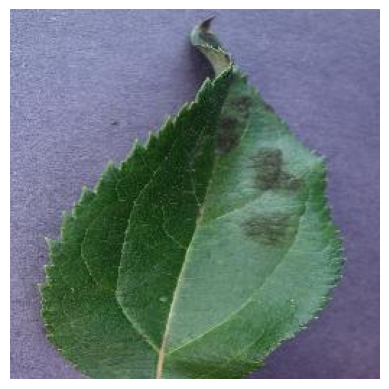

In [14]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG'

img = mpimg.imread(image_path)

print(img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()


In [15]:
print(img)

[[[145 151 187]
  [128 134 170]
  [142 148 184]
  ...
  [129 131 169]
  [129 131 169]
  [130 132 170]]

 [[137 143 179]
  [126 132 168]
  [137 143 179]
  ...
  [121 123 161]
  [120 122 160]
  [120 122 160]]

 [[154 160 196]
  [144 150 186]
  [140 146 182]
  ...
  [117 119 157]
  [115 117 155]
  [114 116 154]]

 ...

 [[139 132 166]
  [136 129 163]
  [140 133 167]
  ...
  [ 94  79 112]
  [ 96  81 114]
  [ 98  83 116]]

 [[128 121 155]
  [124 117 151]
  [135 128 162]
  ...
  [ 94  79 112]
  [ 94  79 112]
  [ 96  81 114]]

 [[137 130 164]
  [131 124 158]
  [145 138 172]
  ...
  [ 92  77 110]
  [ 92  77 110]
  [ 93  78 111]]]


## Train test split

In [16]:
# image parameters

img_size = 224 # usual size which can capture most information
batch_size = 32

In [17]:
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)


**flow_from_directory**

It assumes a directory structure where each subdirectory represents a class, and the images belonging to that class are stored within that subdirectory. This organization is convenient for large datasets as it helps keep the data organized and easily accessible.


In [18]:
## Train generator

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)


Found 43456 images belonging to 38 classes.


In [19]:
## Validation generator

val_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Below command helps you the know the attributes and method of a generator object

In [20]:
print(type(train_generator))

print(dir(train_generator))

<class 'keras.src.preprocessing.image.DirectoryIterator'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_filepaths', '_flow_index', '_get_batches_of_transformed_samples', '_keras_api_names', '_keras_api_names_v1', '_set_index_array', 'allowed_class_modes', 'batch_index', 'batch_size', 'class_indices', 'class_mode', 'classes', 'color_mode', 'data_format', 'directory', 'dtype', 'filenames', 'filepaths', 'image_data_generator', 'image_shape', 'index_array', 'index_generator', 'interpolation', 'keep_aspect_ratio', 'labels', 'lock', 'n', 'next', 'num_classes', 'on_epoch_end', 'reset', 'sample_weight', 'samples', 'save_format', 'save_prefix', 'save

## Convulational neural network

In [21]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout

from keras.callbacks import EarlyStopping

In [22]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (img_size, img_size, 3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.25),
    Dense(128, activation = 'relu'),
    Dense(train_generator.num_classes, activation = 'softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [24]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size,
    callbacks = [early_stopping]
)

Epoch 1/25
1358/1358 [==============================] - 143s 99ms/step - loss: 1.3805 - accuracy: 0.6068 - val_loss: 0.7536 - val_accuracy: 0.7730
Epoch 2/25
1358/1358 [==============================] - 134s 99ms/step - loss: 0.6249 - accuracy: 0.8040 - val_loss: 0.5181 - val_accuracy: 0.8322
Epoch 3/25
1358/1358 [==============================] - 134s 99ms/step - loss: 0.4204 - accuracy: 0.8631 - val_loss: 0.4475 - val_accuracy: 0.8567
Epoch 4/25
1358/1358 [==============================] - 133s 98ms/step - loss: 0.3118 - accuracy: 0.8978 - val_loss: 0.3700 - val_accuracy: 0.8848
Epoch 5/25
1358/1358 [==============================] - 132s 97ms/step - loss: 0.2610 - accuracy: 0.9160 - val_loss: 0.4463 - val_accuracy: 0.8691
Epoch 6/25
1358/1358 [==============================] - 132s 97ms/step - loss: 0.2139 - accuracy: 0.9306 - val_loss: 0.3955 - val_accuracy: 0.8895
Epoch 7/25
1358/1358 [==============================] - 131s 97ms/step - loss: 0.1845 - accuracy: 0.9398 - val_loss: 0

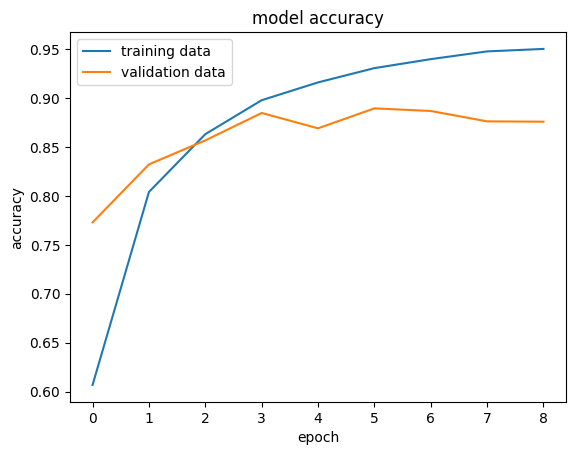

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

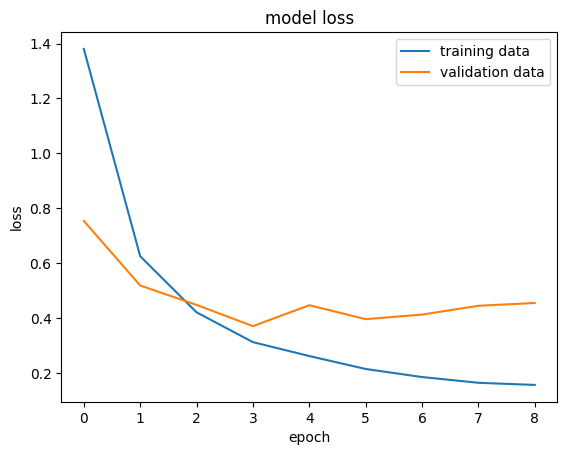

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

### Building a predictive system

In [28]:
def load_and_preprocess_image(image_path, target_size =(224, 224)):

  img = Image.open(image_path)

  img = img.resize(target_size)

  img_array = np.array(img)

  # add batch dimension as the model needs input in terms of batch (look above)
  img_array = np.expand_dims(img_array, axis = 0)

  img_array = img_array.astype('float32')/255

  return img_array


def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)

  predicted_class_index = np.argmax(predictions, axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]

  return predicted_class_name

In [29]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [30]:
# Create a mapping from class indices to class names

class_indices = {val: key for key, val in train_generator.class_indices.items()}

In [31]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

#### One example usage


Atm it doesnt have 100% accuracy

In [32]:
image_path = '/content/plantvillage dataset/segmented/Corn_(maize)___Common_rust_/007f6e89-3e7c-4e6a-8ef6-8058c7133799___RS_Rust 1933_final_masked.jpg'
image_path2 = '/content/plantvillage dataset/color/Potato___Late_blight/0051e5e8-d1c4-4a84-bf3a-a426cdad6285___RS_LB 4640.JPG'

predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f'Predicted class name is {predicted_class_name}')


1/1 [==============================] - 0s 284ms/step
Predicted class name is Corn_(maize)___Common_rust_


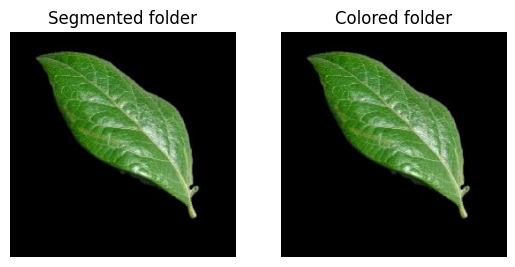

In [33]:
img2 = mpimg.imread('/content/plantvillage dataset/segmented/Blueberry___healthy/01ca7a9f-80a6-4693-a067-50684beda81d___RS_HL 2545_final_masked.jpg')

img3 = mpimg.imread('/content/plantvillage dataset/color/Blueberry___healthy/0137389a-9b78-4a94-afdb-c2b50861f89c___RS_HL 2347.JPG')


fig, axes = plt.subplots(1,2)

axes[0].imshow(img2)
axes[0].axis('off')
axes[0].set_title('Segmented folder')

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('Colored folder')


plt.show()

### save the model and class indices

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
model.save('/Users/pragya/Desktop/LEARN/Kaggle_practice/plant_disease_prediction_model.h5')

In [ ]:
model.save('plant_disease_prediction_model.h5')


## NOTE:
use drive.mount for future purposes

In [ ]:
## from google.colab import drive
# drive.mount('/content/drive')

# # Save the model to Google Drive
# model.save('/content/drive/My Drive/plant_disease_prediction_model.h5')